In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [105]:
from matplotlib import font_manager, rc
import matplotlib
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family=font_name)

plt.rcParams['font.family'] = 'Malgun Gothic'

In [4]:
# 미세먼지 데이터 읽기
pm10_df = pd.read_csv("./Git/데이터/1. 종속변수/국내미세먼지농도.csv", index_col = 0, header = [0, 1])
pm25_df = pd.read_csv("./Git/데이터/1. 종속변수/국내초미세먼지농도.csv", index_col = 0, header = [0, 1])

In [6]:
# 기상 데이터 읽기
kr_df = pd.read_csv("./독립변수/국내기상데이터.csv", index_col = 0, header = [0, 1])

In [30]:
pm10_df

PM10                             
지역                  강원 강릉시 광주 북구  대전 중구 부산 해운대구 서울 서대문구
일시                                                     
2015-01-01 03:00:00   35.0  21.7   33.3    18.7    63.7
2015-01-01 06:00:00   45.3  21.0   61.3    19.0   113.3
2015-01-01 09:00:00   56.3  21.7   95.0    28.3   135.0
2015-01-01 12:00:00   68.7  41.0  124.0    53.5    85.0
2015-01-01 15:00:00   88.3  70.3   56.3    54.3    44.7
...                    ...   ...    ...     ...     ...
2024-05-19 09:00:00   22.0  24.7   17.3    23.3    18.0
2024-05-19 12:00:00   25.0  21.3   30.0    33.3    17.0
2024-05-19 15:00:00   45.3  14.0   19.0    36.7    18.3
2024-05-19 18:00:00   34.3  20.7   16.3    32.3    24.7
2024-05-19 21:00:00   35.7  20.0   11.7    36.3    17.7

[27415 rows x 5 columns]

In [31]:
kr_df.head()

강수량                                               ...  \
                      90  101  102  105  108  119  127  133  140  152  ...   
일시                                                                     ...   
2015-01-01 03:00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2015-01-01 06:00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2015-01-01 09:00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2015-01-01 12:00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2015-01-01 15:00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   

                             풍향                                        \
                    (279, 60.0) (279, 90.0) (279, 120.0) (279, 150.0)   
일시                                                                      
2015-01-01 03:00:00           0           0            0            0   
2015-01-01 06:00:00           0           0            0            0   
2015-01-01 09:00:00           0           0            0            0   
2015-01-01 12:00:00           0           0            0            0   
2015-01-01 15:00:00           0           0            0            0   

                                                                         \
                    (279, 180.0) (279, 210.0) (279, 240.0) (279, 270.0)   
일시                                                                        
2015-01-01 03:00:00            0            0            0            0   
2015-01-01 06:00:00            0            0            0            0   
2015-01-01 09:00:00            0            0            0            0   
2015-01-01 12:00:00            0            0            0            0   
2015-01-01 15:00:00            0            0            0            0   

                                               
                    (279, 300.0) (279, 330.0)  
일시                                             
2015-01-01 03:00:00            1            0  
2015-01-01 06:00:00            1            0  
2015-01-01 09:00:00            1            0  
2015-01-01 12:00:00            1            0  
2015-01-01 15:00:00            1            0  

[5 rows x 399 columns]

In [32]:
seoul_df = kr_df.xs("108", axis = 1, level = 1)

In [33]:
seoul_df.index

Index(['2015-01-01 03:00:00', '2015-01-01 06:00:00', '2015-01-01 09:00:00',
       '2015-01-01 12:00:00', '2015-01-01 15:00:00', '2015-01-01 18:00:00',
       '2015-01-01 21:00:00', '2015-01-02 00:00:00', '2015-01-02 03:00:00',
       '2015-01-02 06:00:00',
       ...
       '2024-05-18 18:00:00', '2024-05-18 21:00:00', '2024-05-19 00:00:00',
       '2024-05-19 03:00:00', '2024-05-19 06:00:00', '2024-05-19 09:00:00',
       '2024-05-19 12:00:00', '2024-05-19 15:00:00', '2024-05-19 18:00:00',
       '2024-05-19 21:00:00'],
      dtype='object', name='일시', length=27415)

In [34]:
pm10_df[("PM10", "서울 서대문구")]

일시
2015-01-01 03:00:00     63.7
2015-01-01 06:00:00    113.3
2015-01-01 09:00:00    135.0
2015-01-01 12:00:00     85.0
2015-01-01 15:00:00     44.7
                       ...  
2024-05-19 09:00:00     18.0
2024-05-19 12:00:00     17.0
2024-05-19 15:00:00     18.3
2024-05-19 18:00:00     24.7
2024-05-19 21:00:00     17.7
Name: (PM10, 서울 서대문구), Length: 27415, dtype: float64

In [35]:
seoul_df = pd.concat([pm10_df[("PM10", "서울 서대문구")], seoul_df], axis = 1)

In [39]:
seoul_df.index = seoul_df.index.map(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

In [42]:
seoul_df["month"] = seoul_df.index.map(lambda x: x.month)
seoul_df["day"] = seoul_df.index.map(lambda x: x.day)
seoul_df["hour"] = seoul_df.index.map(lambda x: x.hour)

## 강수 여부에 따른 미세먼지 수치 분석

In [53]:
seoul_df["강수여부"] = seoul_df["강수량"] != 0

In [89]:
perc_df = pd.concat([seoul_df[seoul_df["강수여부"] == False].groupby("month").mean().iloc[:, 0],
seoul_df[seoul_df["강수여부"] == True].groupby("month").mean().iloc[:, 0]], axis = 1)

In [90]:
perc_df.columns = ["False", "True"]

In [91]:
perc_df

,False,True
month,,
1,47.638928,33.669697
2,49.946889,27.285517
3,59.775706,32.388793
4,53.299315,25.552217
5,49.681737,22.493162
6,34.777680,22.019196
7,25.612062,15.851499
8,23.536069,13.395148
9,22.497275,13.466337


In [55]:
perc_df = seoul_df.groupby(["month", "강수여부"]).mean().iloc[:, 0]

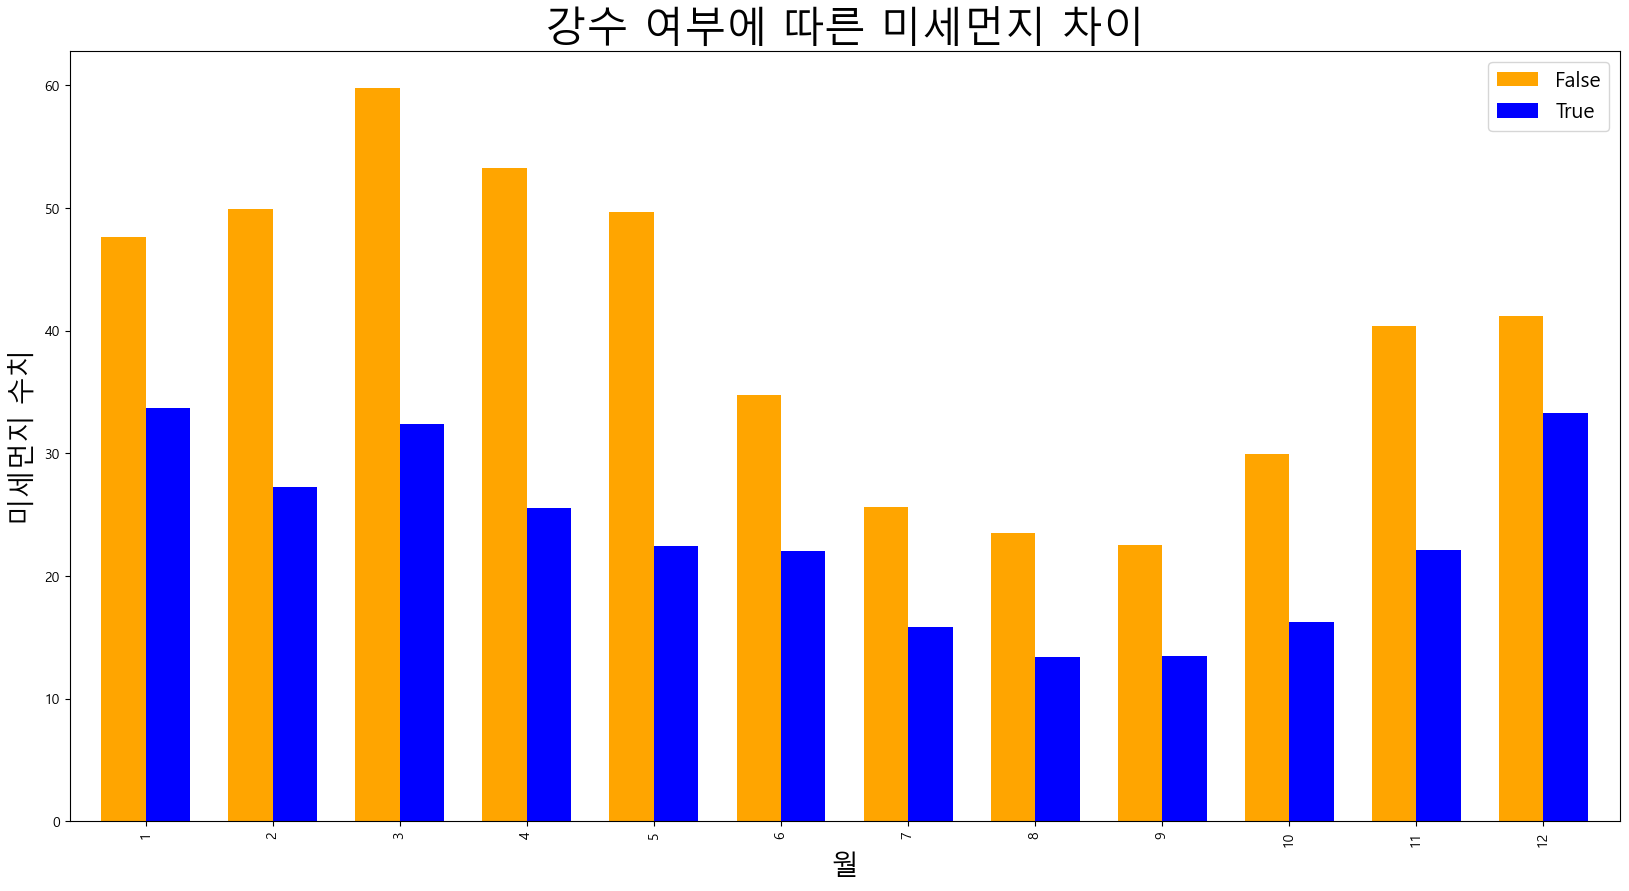

In [97]:
# 막대 그래프 그리기
perc_df.plot(kind = "bar", figsize = (20, 10), width = 0.7, color = ["orange", "blue"])

plt.title("강수 여부에 따른 미세먼지 차이", size = 30)
plt.ylabel("미세먼지 수치", size = 20)
plt.xlabel("월", size = 20)
plt.legend(fontsize = 15)

plt.show()

- 정말로 비오는 시간대에는 미세먼지가 적다
- 크게는 2배 이상, 작게는 약 33%

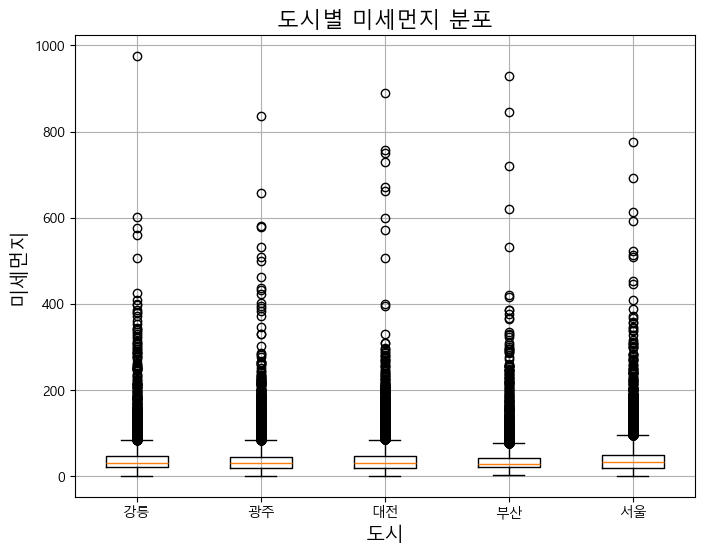

In [116]:
# 박스 플롯 그리기
plt.figure(figsize=(8, 6))
plt.boxplot([pm10_df.dropna().iloc[:, 0],
                 pm10_df.dropna().iloc[:, 1],
                 pm10_df.dropna().iloc[:, 2],
                 pm10_df.dropna().iloc[:, 3],
                 pm10_df.dropna().iloc[:, 4]], labels=["강릉", "광주", "대전", "부산", "서울"])

plt.title("도시별 미세먼지 분포", fontsize=16)
plt.xlabel("도시", fontsize=14)
plt.ylabel("미세먼지", fontsize=14)
plt.grid(True)

plt.show()

In [119]:
pm10_df.describe()

PM10                                                        
지역           강원 강릉시         광주 북구         대전 중구       부산 해운대구       서울 서대문구
count  25950.000000  26377.000000  26708.000000  26723.000000  26805.000000
mean      36.830902     36.511059     36.642631     34.295981     38.878023
std       27.814771     28.662900     29.406137     25.392648     33.197955
min        1.000000      1.000000      1.000000      2.000000      1.000000
25%       20.700000     19.700000     19.700000     20.000000     19.700000
50%       31.150000     30.300000     31.000000     28.700000     32.000000
75%       46.000000     45.300000     45.700000     42.000000     49.300000
max      976.000000    835.300000    890.300000    928.300000    949.700000